In [8]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('q3.csv') 
df.columns = df.columns.str.strip()

df['Football_Match'] = df['Football_Match'].astype(int)

X = df[['Football_Match']]
X = sm.add_constant(X)  

df['Accident'] = 1 
y = df['Accident'] 

model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary of the regression results
print(model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accident   No. Observations:               162308
Model:                            GLM   Df Residuals:                   162306
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6231e+05
Date:                Wed, 11 Dec 2024   Deviance:                       0.0000
Time:                        19:01:01   Pearson chi2:                     0.00
No. Iterations:                     1   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const                   0      0.003        

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


/var/folders/nn/px2pg7mx2dgdb26l6yfz_xr80000gn/T/ipykernel_5014/4285746245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Football_Match', palette='Set2')


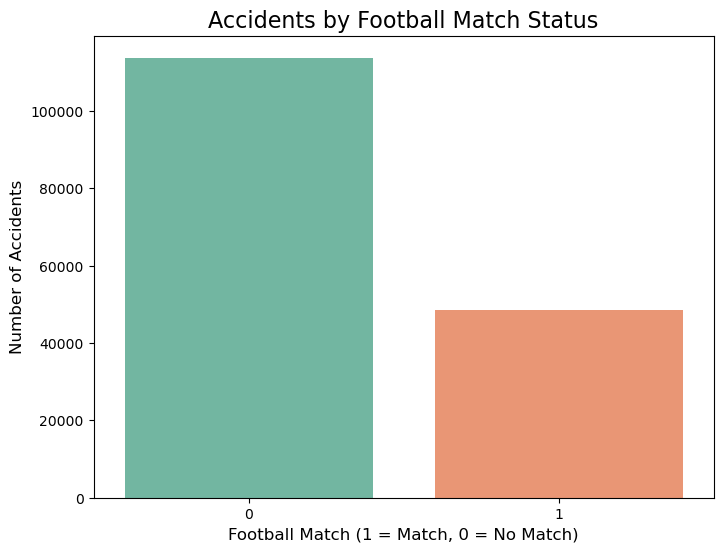

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize the distribution of accidents by football match status
plt.figure(figsize=(8, 6))

# Plotting the number of accidents for match vs. non-match days
sns.countplot(data=df, x='Football_Match', palette='Set2')

# Adding labels and title
plt.title('Accidents by Football Match Status', fontsize=16)
plt.xlabel('Football Match (1 = Match, 0 = No Match)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Display the plot
plt.show()


In [10]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


q6 = pd.read_csv("q6.csv")  # Example dataset


df['light_group'] = df['light_group'].astype('category')
df['Speed_limit'] = df['Speed_limit'].astype('category')

# Poisson Regression Model
model = smf.poisson("accident_count ~ Speed_limit + light_group", data=df).fit()

# Summary of results
print(model.summary())


PatsyError: Error evaluating factor: NameError: name 'accident_count' is not defined
    accident_count ~ Speed_limit + light_group
    ^^^^^^^^^^^^^^

In [14]:
df_grouped = df.groupby(['Speed_limit', 'light_group'], observed=False).size().reset_index(name='accident_count')


In [50]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


q6 = pd.read_csv("q6.csv")  # Example dataset


df['light_group'] = df['light_group'].astype('category')
df['Speed_limit'] = df['Speed_limit'].astype('category')

# Poisson Regression Model
model = smf.poisson("accident_count ~ Speed_limit + light_group", data=df).fit()

# Summary of results
print(model.summary())


KeyError: 'light_group'

In [51]:
import pandas as pd
import statsmodels.formula.api as smf

# Create a DataFrame manually with your data
# Replace the accident_count values with your actual data

data = {
    'Speed_limit': [15, 15, 15, 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'light_group': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accident_count': [2,1689, 78846, 7763, 2620,2703,4207,0,84,4745,538,196, 463, 412, 0, 44, 1520, 215, 91, 215, 245]  # Replace these numbers with your data
}

q6 = q6.DataFrame(data)

# Fit the Poisson regression model
model = smf.poisson(formula="accident_count ~ Speed_limit + light_group", data=df).fit()

# Print model summary
print(model.summary())

# Optional: Visualize the relationship between variables
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show accident counts by Speed_limit and light_group
pivot_table = df.pivot("Speed_limit", "light_group", "accident_count")
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm")
plt.title("Accident Counts by Speed Limit and Light Group")
plt.xlabel("Light Group")
plt.ylabel("Speed Limit")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import poisson

# Example dataset with 100 customers
data = {
    'height': ['short', 'average', 'short', 'short', 'tall', 'tall', 'average', 'average', 'average', 'average'], 
    'weight': ['thin', 'medium', 'fat', 'fat', 'medium', 'thin', 'medium', 'medium','medium', 'medium'],  # 100 customer weights
    'count': [1,1,1,1,1,1,1,1,1,1]  # All customers, one entry per observation (or count data if it varies)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical variables (height and weight) to dummy variables
df['height'] = df['height'].map({'short': 0, 'average': 1, 'tall': 2})  # Numeric encoding
df['weight'] = df['weight'].map({'thin': 0, 'medium': 1, 'fat': 2})  # Numeric encoding

# Poisson regression model with height and weight
model = poisson('count ~ height + weight', data=df).fit()

# Display results
print(model.summary())


Optimization terminated successfully.
         Current function value: 1.000000
         Iterations 3
                          Poisson Regression Results                          
Dep. Variable:                  count   No. Observations:                   10
Model:                        Poisson   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                   0.000
Time:                        21:19:01   Log-Likelihood:                -10.000
converged:                       True   LL-Null:                       -10.000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.082e-17      0.923   6.59e-17      1.000      -1.810       1.810
height     -2.132e-17      0.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/p

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import poisson

# Create the dataset
data = {
    'speed_limit': [15, 20, 30, 40, 50, 60, 70],
    'accidents': [2, 1817, 85111, 8615, 2907, 3381, 4864]
}

# Create DataFrame
df = pd.DataFrame(data)

# Fit Poisson regression model
model = poisson('accidents ~ speed_limit', data=df).fit()

# Display the results
print(model.summary())


Optimization terminated successfully.
         Current function value: 16454.154940
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:              accidents   No. Observations:                    7
Model:                        Poisson   Df Residuals:                        5
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                 0.05708
Time:                        21:23:06   Log-Likelihood:            -1.1518e+05
converged:                       True   LL-Null:                   -1.2215e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3692      0.007   1566.732      0.000      10.356      10.382
speed_limit    -0.0198

Optimization terminated successfully.
         Current function value: 16454.154940
         Iterations 5


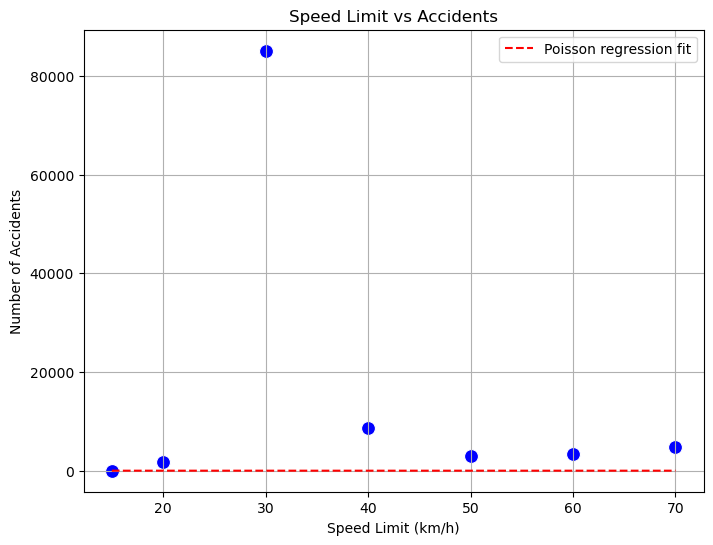

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    'speed_limit': [15, 20, 30, 40, 50, 60, 70],
    'accidents': [2, 1817, 85111, 8615, 2907, 3381, 4864]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed_limit', y='accidents', data=df, s=100, color='b', marker='o')

# Optionally, you can fit a line to the scatter plot (Poisson regression fit)
import numpy as np
from statsmodels.api import Poisson

# Fit Poisson regression model
model = Poisson.from_formula('accidents ~ speed_limit', data=df).fit()

# Get the predicted values
df['predicted'] = model.fittedvalues

# Plot the predicted values as a line
plt.plot(df['speed_limit'], df['predicted'], color='r', linestyle='--', label='Poisson regression fit')

# Adding labels and title
plt.title("Speed Limit vs Accidents")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Number of Accidents")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Optimization terminated successfully.
         Current function value: 4070.565968
         Iterations 8


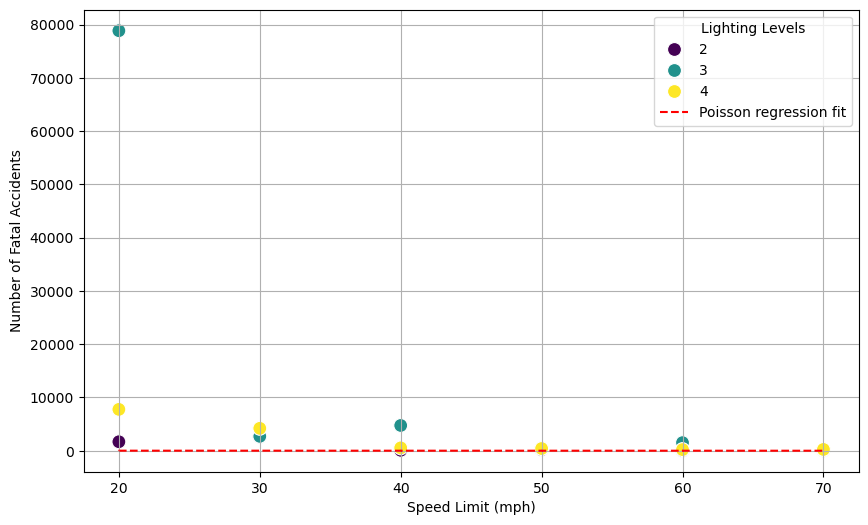

                          Poisson Regression Results                          
Dep. Variable:              accidents   No. Observations:                   18
Model:                        Poisson   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.6102
Time:                        14:29:34   Log-Likelihood:                -73270.
converged:                       True   LL-Null:                   -1.8797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.6971      0.016    776.138      0.000      12.665      12.729
speed_limit    -0.1432      0.000   -297.745      0.000      -0.144      -0.142
lighting        0.1221      0.004     32.430    

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Poisson

# Create the extended dataset with lighting levels
data = {
    'speed_limit': [ 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [ 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [ 1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create scatter plot for accidents vs. speed limit with lighting levels as color
sns.scatterplot(x='speed_limit', y='accidents', hue='lighting', palette="viridis", data=df, s=100, marker='o')

# Fit Poisson regression model with both speed limit and lighting as predictors
model = Poisson.from_formula('accidents ~ speed_limit + lighting', data=df).fit()

# Get the predicted values from the model
df['predicted'] = model.fittedvalues

# Plot the predicted values as a line
plt.plot(df['speed_limit'], df['predicted'], color='r', linestyle='--', label='Poisson regression fit')

# Adding labels and title
plt.title("")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Fatal Accidents")
plt.legend(title="Lighting Levels")

# Display the plot
plt.grid(True)
plt.show()

# Display model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 4070.565968
         Iterations 8


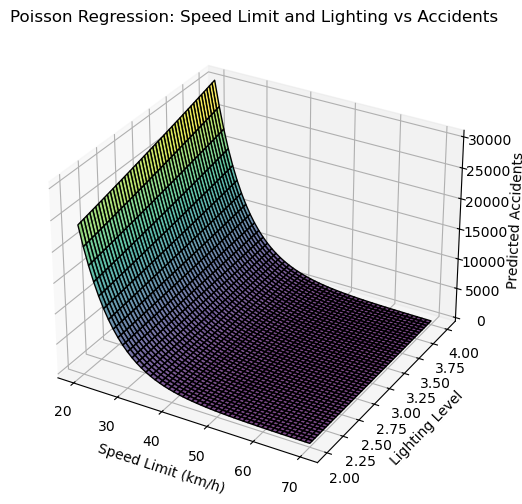

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.api import Poisson

# Create the extended dataset with lighting levels
data = {
    'speed_limit': [ 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [ 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [ 1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Create DataFrame
df = pd.DataFrame(data)

# Fit Poisson regression model with both speed limit and lighting as predictors
model = Poisson.from_formula('accidents ~ speed_limit + lighting', data=df).fit()

# Create a mesh grid for plotting
speed_limits = np.linspace(df['speed_limit'].min(), df['speed_limit'].max(), 50)
lightings = np.linspace(df['lighting'].min(), df['lighting'].max(), 50)
X, Y = np.meshgrid(speed_limits, lightings)

# Predict accidents using the Poisson regression model
predicted_accidents = model.predict(pd.DataFrame({'speed_limit': X.ravel(), 'lighting': Y.ravel()}))

# Convert predictions to a 2D array for reshaping
Z = np.array(predicted_accidents).reshape(X.shape)

# Plotting the 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and title
ax.set_xlabel('Speed Limit (km/h)')
ax.set_ylabel('Lighting Level')
ax.set_zlabel('Predicted Accidents')
ax.set_title('Poisson Regression: Speed Limit and Lighting vs Accidents')

# Show the plot
plt.show()


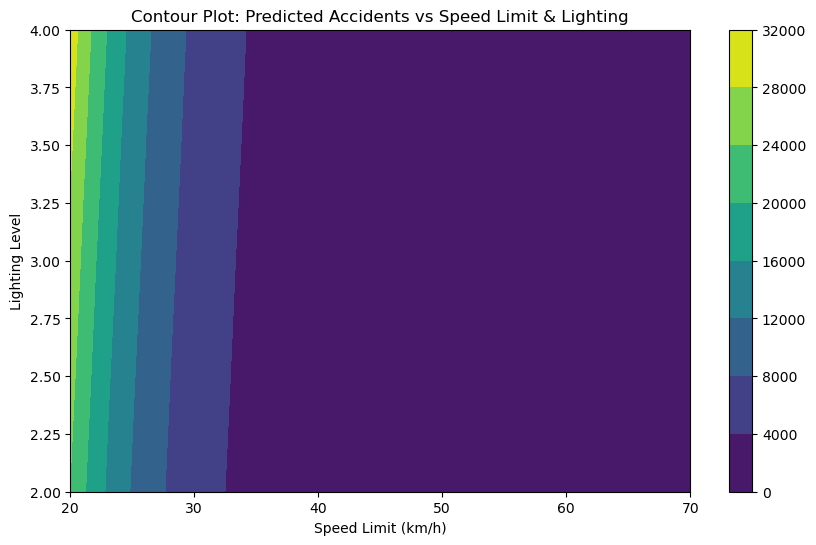

In [25]:
# 2D Contour Plot
plt.figure(figsize=(10, 6))
cp = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Lighting Level')
plt.title('Contour Plot: Predicted Accidents vs Speed Limit & Lighting')
plt.show()


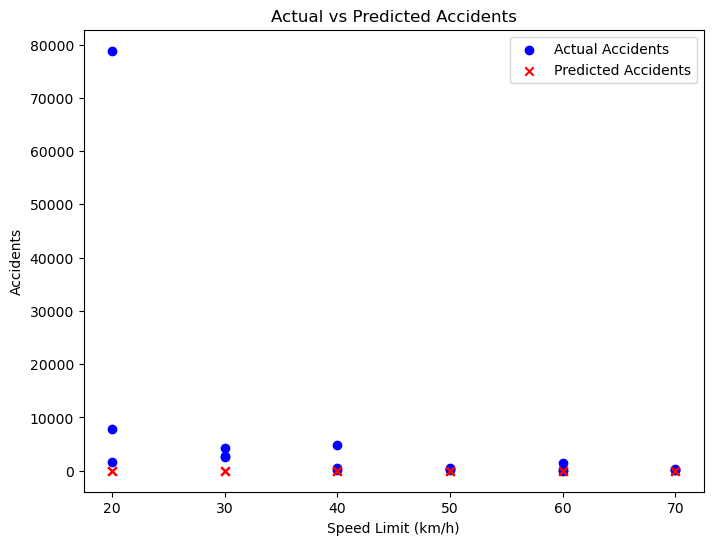

In [26]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['speed_limit'], df['accidents'], label='Actual Accidents', color='blue')
plt.scatter(df['speed_limit'], model.fittedvalues, label='Predicted Accidents', color='red', marker='x')
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Accidents')
plt.legend()
plt.title('Actual vs Predicted Accidents')
plt.show()


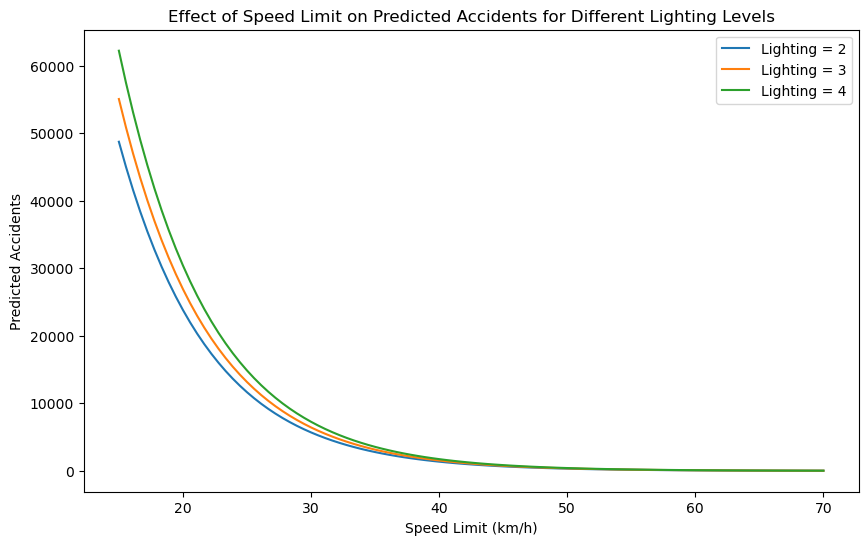

In [27]:
# Effect of Speed Limit on Accidents for different Lighting levels
lighting_levels = [2, 3, 4]
plt.figure(figsize=(10, 6))

for lighting in lighting_levels:
    predicted_accidents = model.predict(pd.DataFrame({'speed_limit': np.linspace(15, 70, 100), 'lighting': [lighting] * 100}))
    plt.plot(np.linspace(15, 70, 100), predicted_accidents, label=f'Lighting = {lighting}')

plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Predicted Accidents')
plt.legend()
plt.title('Effect of Speed Limit on Predicted Accidents for Different Lighting Levels')
plt.show()


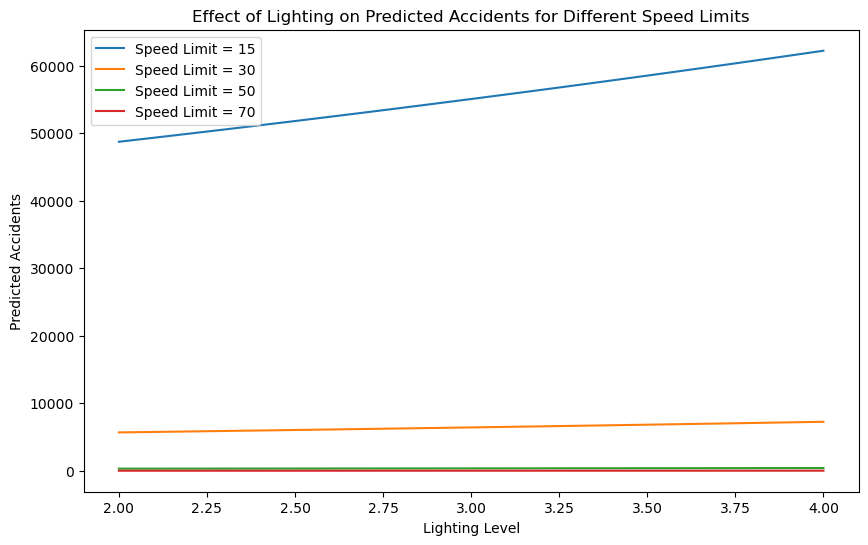

In [28]:
# Effect of Lighting on Accidents for different Speed Limits
speed_limits = [15, 30, 50, 70]
plt.figure(figsize=(10, 6))

for speed in speed_limits:
    predicted_accidents = model.predict(pd.DataFrame({'speed_limit': [speed] * 100, 'lighting': np.linspace(2, 4, 100)}))
    plt.plot(np.linspace(2, 4, 100), predicted_accidents, label=f'Speed Limit = {speed}')

plt.xlabel('Lighting Level')
plt.ylabel('Predicted Accidents')
plt.legend()
plt.title('Effect of Lighting on Predicted Accidents for Different Speed Limits')
plt.show()


Model Coefficients:
Intercept: 9.140750744878165
Coefficients: [-0.06582838  0.29844243]

Performance Metrics:
Mean Squared Error: 1324960447.4990325
Mean Absolute Error: 19328.815144075546


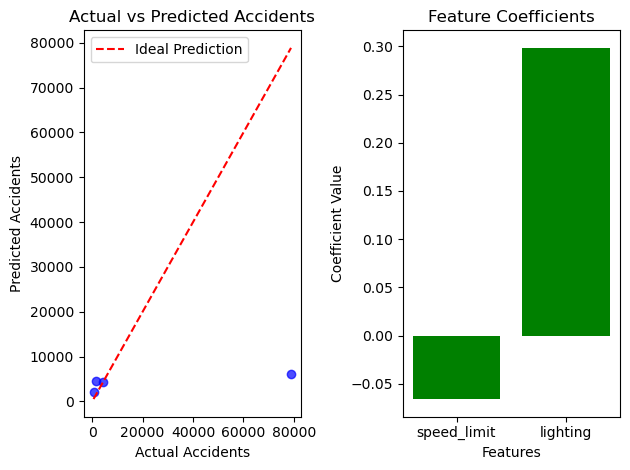

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
y = df['accidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Poisson regression model
model = PoissonRegressor(alpha=1e-12, max_iter=10000)  # Small alpha for minimal regularization
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model coefficients and performance metrics
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Scatter plot of actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.xlabel('Actual Accidents')
plt.ylabel('Predicted Accidents')
plt.title('Actual vs Predicted Accidents')
plt.legend()

# Bar plot for feature coefficients
plt.subplot(1, 2, 2)
coefficients = model.coef_
features = X.columns
plt.bar(features, coefficients, color='green')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')

plt.tight_layout()
plt.show()


Model Coefficients:
Intercept: 8.960511898426722
Coefficients: [-0.06737637  0.29754402]

Performance Metrics:
Mean Squared Error: 861152577.476275
Mean Absolute Error: 15648.585485840473


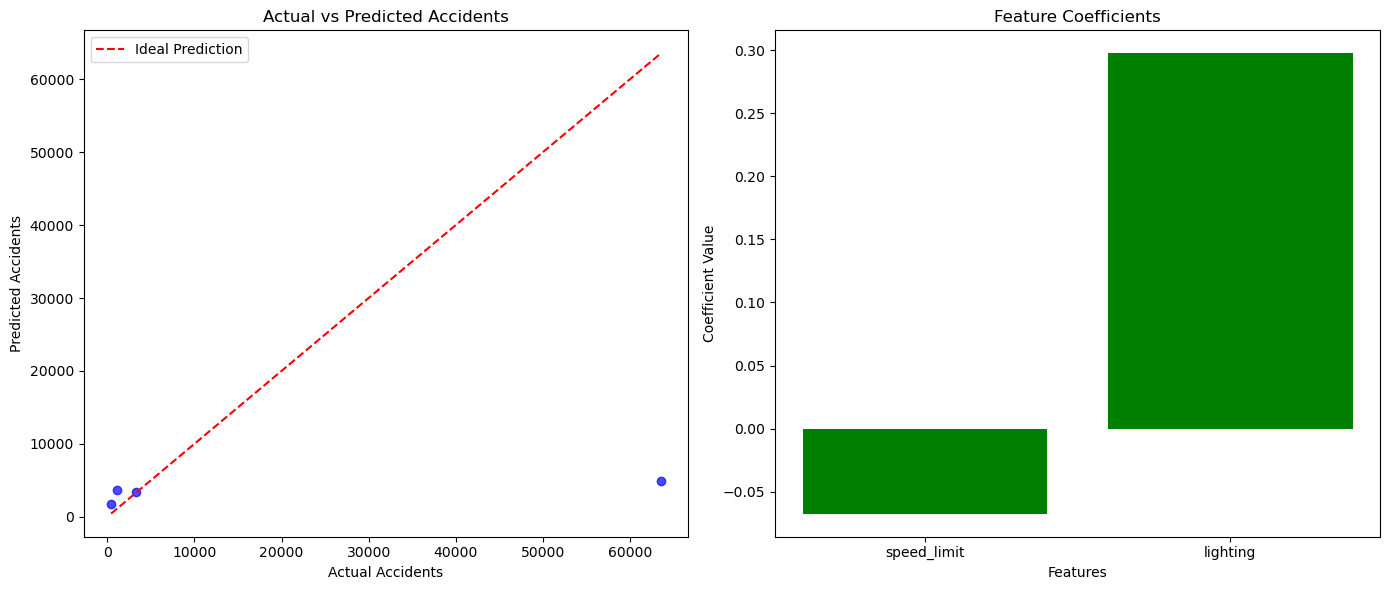

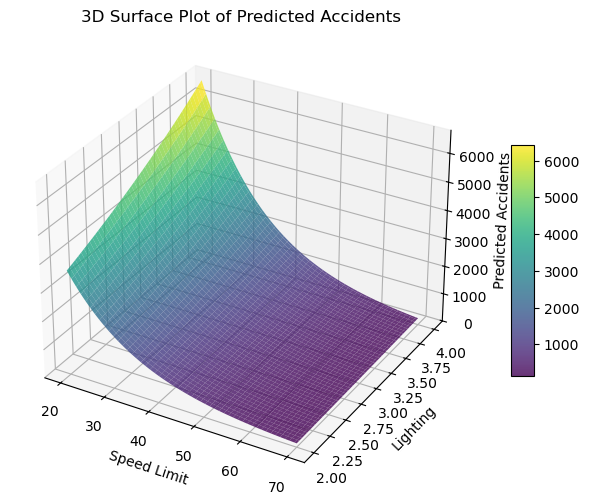

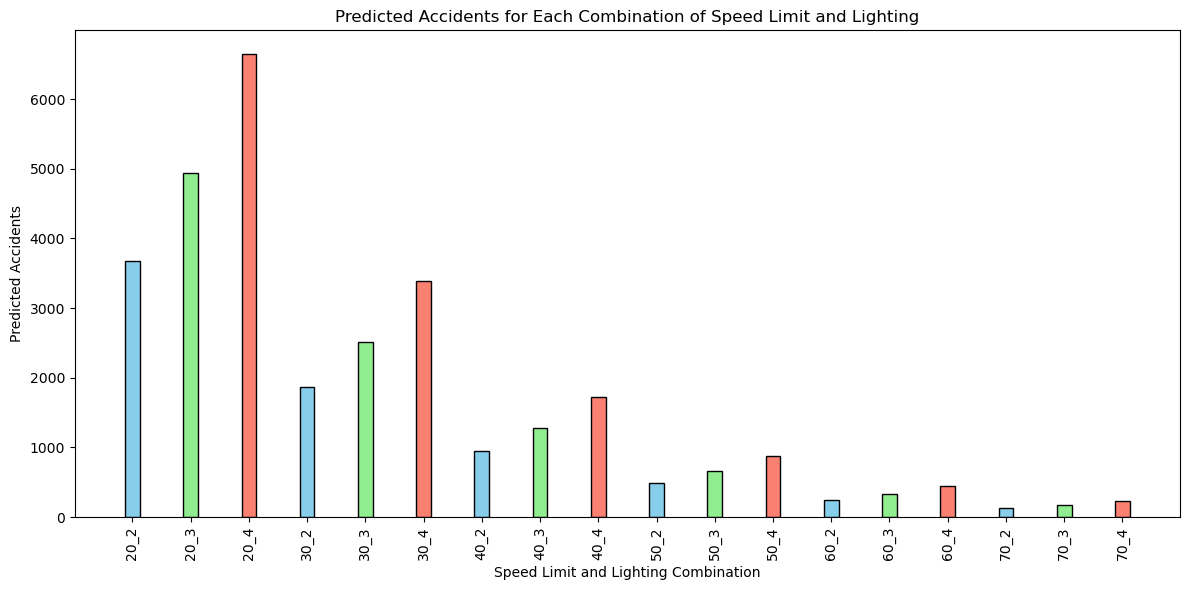

In [72]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1139,63564,6225,2036,2136,3254,51,3891,427,147,394,305, 32, 1119,149,57,148,174] 
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
y = df['accidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Poisson regression model
model = PoissonRegressor(alpha=1e-12, max_iter=10000)  # Small alpha for minimal regularization
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model coefficients and performance metrics
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualizations
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.xlabel('Actual Accidents')
plt.ylabel('Predicted Accidents')
plt.title('Actual vs Predicted Accidents')
plt.legend()

# Bar plot for feature coefficients
plt.subplot(1, 2, 2)
coefficients = model.coef_
features = X.columns
plt.bar(features, coefficients, color='green')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')

plt.tight_layout()
plt.show()

# 3D Surface Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate a grid of values for surface plot
speed_limit_range = np.linspace(df['speed_limit'].min(), df['speed_limit'].max(), 100)
lighting_range = np.linspace(df['lighting'].min(), df['lighting'].max(), 100)
speed_limit_grid, lighting_grid = np.meshgrid(speed_limit_range, lighting_range)

# Predict values for the grid
grid_data = pd.DataFrame({
    'speed_limit': speed_limit_grid.ravel(),
    'lighting': lighting_grid.ravel()
})
accident_predictions = model.predict(grid_data).reshape(speed_limit_grid.shape)

# Plot the surface
surf = ax.plot_surface(speed_limit_grid, lighting_grid, accident_predictions, cmap='viridis', alpha=0.8)
ax.set_xlabel('Speed Limit')
ax.set_ylabel('Lighting')
ax.set_zlabel('Predicted Accidents')
plt.title('3D Surface Plot of Predicted Accidents')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()








# Create a new column for the combination of speed_limit and lighting
df['speed_limit_lighting'] = df['speed_limit'].astype(str) + '_' + df['lighting'].astype(str)

# Group by the combination and get the corresponding predictions
df_grouped = df.groupby('speed_limit_lighting').mean()
y_pred_grouped = model.predict(df_grouped[['speed_limit', 'lighting']])

# Prepare the plot
plt.figure(figsize=(12, 6))

# Define colors for each lighting level
colors = {2: 'skyblue', 3: 'lightgreen', 4: 'salmon'}

# Width and space adjustments for the bars
bar_width = 0.25  # Width of each bar
space_between_groups = 1.2  # Space between different speed_limit groups

# Generate positions for the bars, grouped by speed_limit
positions = []
for i, (combo, _) in enumerate(df_grouped.iterrows()):
    speed, lighting = combo.split('_')
    speed_idx = int(speed) // 10 - 2  # Calculate speed index (20, 30, 40, etc.)
    lighting_idx = int(lighting) - 2  # Adjust the lighting index (2, 3, 4)
    positions.append(speed_idx * len(colors) + lighting_idx)  # Combine speed and lighting into unique positions

# Plot the bars
for i, (combo, _) in enumerate(df_grouped.iterrows()):
    lighting = int(combo.split('_')[1])  # Extract lighting from the combination
    plt.bar(positions[i], y_pred_grouped[i], width=bar_width, color=colors[lighting], edgecolor='black')

# Customize labels and title
plt.xticks(range(len(df_grouped)), df_grouped.index, rotation=90)
plt.xlabel('Speed Limit and Lighting Combination')
plt.ylabel('Predicted Accidents')
plt.title('Predicted Accidents for Each Combination of Speed Limit and Lighting')
plt.tight_layout()
plt.show()



In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Log-transform the dependent variable (accidents)
df['log_accidents'] = np.log(df['accidents'])

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
y = df['log_accidents']

# Initialize and fit the Poisson regression model
model = PoissonRegressor(alpha=1e-12, max_iter=10000)
model.fit(X, y)

# Print coefficients (betas)
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_)


Intercept (β0): 2.162970235860589
Coefficients (β1, β2): [-0.01238418  0.08957599]


Model Coefficients:
Intercept: 20.107603629710468
Coefficients: [-0.11939748 -2.81321764]

Performance Metrics:
Mean Squared Error: 7906772510.477756
Mean Absolute Error: 47300.41066262127


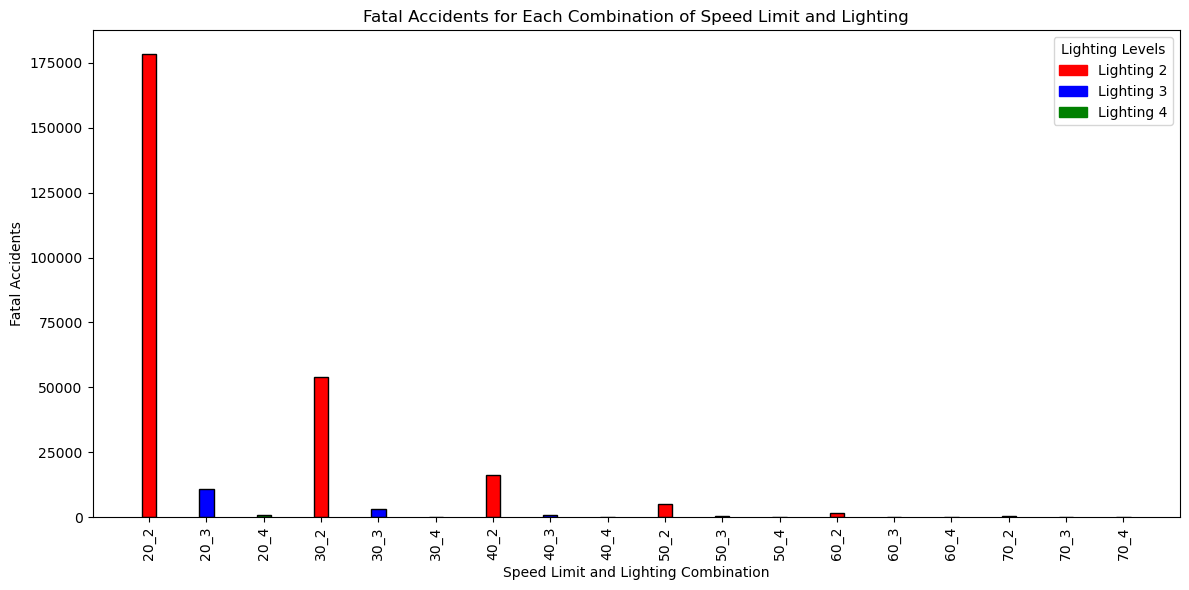

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
y = df['accidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Poisson regression model
model = PoissonRegressor(alpha=1e-12, max_iter=10000)  # Small alpha for minimal regularization
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model coefficients and performance metrics
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualizations
plt.figure(figsize=(12, 6))

# Create a new column for the combination of speed_limit and lighting
df['speed_limit_lighting'] = df['speed_limit'].astype(str) + '_' + df['lighting'].astype(str)

# Group by the combination and get the corresponding predictions
df_grouped = df.groupby('speed_limit_lighting').mean()
y_pred_grouped = model.predict(df_grouped[['speed_limit', 'lighting']])

# Define colors for each lighting level
colors = {2: 'red', 3: 'blue', 4: 'green'}

# Width and space adjustments for the bars
bar_width = 0.25  # Width of each bar
space_between_groups = 1.2  # Space between different speed_limit groups

# Generate positions for the bars, grouped by speed_limit
positions = []
labels = []  # To store the x-axis labels
for i, (combo, _) in enumerate(df_grouped.iterrows()):
    speed, lighting = combo.split('_')
    speed_idx = int(speed) // 10 - 2  # Calculate speed index (20, 30, 40, etc.)
    lighting_idx = int(lighting) - 2  # Adjust the lighting index (2, 3, 4)
    positions.append(speed_idx * len(colors) + lighting_idx)  # Combine speed and lighting into unique positions
    labels.append(f'{speed}_{lighting}')  # Store label for the combination

# Plot the bars
for i, (combo, _) in enumerate(df_grouped.iterrows()):
    lighting = int(combo.split('_')[1])  # Extract lighting from the combination
    plt.bar(positions[i], y_pred_grouped[i], width=bar_width, color=colors[lighting], edgecolor='black')

# Customize labels and title
plt.xticks(positions, labels, rotation=90)
plt.xlabel('Speed Limit and Lighting Combination')
plt.ylabel('Fatal Accidents')
plt.title('Fatal Accidents for Each Combination of Speed Limit and Lighting')

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = [f'Lighting {key}' for key in colors.keys()]
plt.legend(handles, labels, title="Lighting Levels")

plt.tight_layout()
plt.show()


In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Log-transform the dependent variable (accidents)
df['log_accidents'] = np.log(df['accidents'])

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
y = df['log_accidents']

# Initialize and fit the Poisson regression model
model = PoissonRegressor(alpha=1e-12, max_iter=10000)
model.fit(X, y)

# Print coefficients (betas)
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_)


Intercept (β0): 2.162970235860589
Coefficients (β1, β2): [-0.01238418  0.08957599]


In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the data
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['speed_limit', 'lighting']]
X = add_constant(X)  # Adds the constant term (intercept) to the model
y = df['accidents']

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Get the summary of the model
print(poisson_model.summary())

# Calculate Variance Inflation Factors (VIF)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              accidents   No. Observations:                   18
Model:                            GLM   Df Residuals:                       15
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73270.
Date:                Thu, 12 Dec 2024   Deviance:                   1.4639e+05
Time:                        13:53:25   Pearson chi2:                 1.79e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.6971      0.016    776.138      

In [62]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Your data
data = {
    'speed_limit': [20, 30, 40, 50, 60, 70],
    'lighting': [2, 3, 4],
    'accidents': [
        1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 
        463, 412, 44, 1520, 215, 91, 215, 245
    ]
}

# Flattening the data into a format suitable for regression
accidents_flat = data['accidents']
speed_limit_flat = [x for x in data['speed_limit'] for _ in range(len(data['lighting']))]
lighting_flat = data['lighting'] * len(data['speed_limit'])

df = pd.DataFrame({
    'speed_limit': speed_limit_flat,
    'lighting': lighting_flat,
    'accidents': accidents_flat
})

# Fit the Poisson regression model
poisson_model = smf.poisson('accidents ~ speed_limit + lighting', data=df).fit()

# Summary of the model
print(poisson_model.summary())


Optimization terminated successfully.
         Current function value: 4070.565968
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:              accidents   No. Observations:                   18
Model:                        Poisson   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.6102
Time:                        14:10:22   Log-Likelihood:                -73270.
converged:                       True   LL-Null:                   -1.8797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.6971      0.016    776.138      0.000      12.665      12.729
speed_limit    -0.1432 

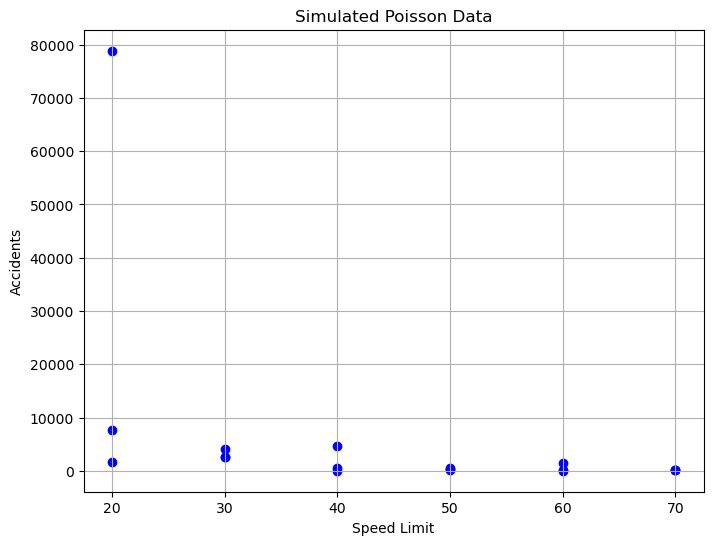

In [63]:
import matplotlib.pyplot as plt

# Your data
speed_limit = [20, 30, 40, 50, 60, 70]
lighting = [2, 3, 4]
accidents = [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 
             463, 412, 44, 1520, 215, 91, 215, 245]

# Flattening the data for plotting
speed_limit_flat = [x for x in speed_limit for _ in range(len(lighting))]
lighting_flat = lighting * len(speed_limit)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(speed_limit_flat, accidents, color='blue')
plt.title('Simulated Poisson Data')
plt.xlabel('Speed Limit')
plt.ylabel('Accidents')
plt.grid(True)
plt.show()


Optimization terminated successfully.
         Current function value: 371.225455
         Iterations 6


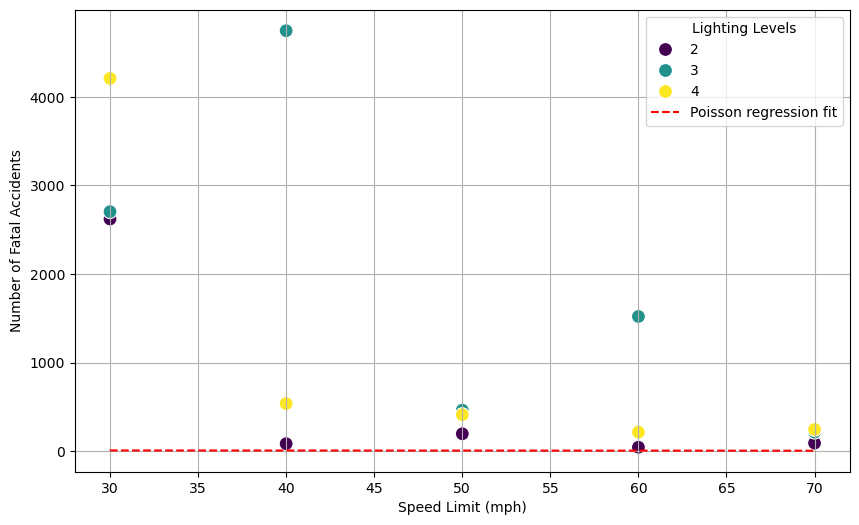

                          Poisson Regression Results                          
Dep. Variable:              accidents   No. Observations:                   15
Model:                        Poisson   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.5636
Time:                        14:31:40   Log-Likelihood:                -5568.4
converged:                       True   LL-Null:                       -12760.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5328      0.040    239.899      0.000       9.455       9.611
speed_limit    -0.0707      0.001   -102.388      0.000      -0.072      -0.069
lighting        0.2133      0.009     23.289    

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Poisson

# Create the extended dataset with lighting levels
data = {
    'speed_limit': [ 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [ 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [  2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create scatter plot for accidents vs. speed limit with lighting levels as color
sns.scatterplot(x='speed_limit', y='accidents', hue='lighting', palette="viridis", data=df, s=100, marker='o')

# Fit Poisson regression model with both speed limit and lighting as predictors
model = Poisson.from_formula('accidents ~ speed_limit + lighting', data=df).fit()

# Get the predicted values from the model
df['predicted'] = model.fittedvalues

# Plot the predicted values as a line
plt.plot(df['speed_limit'], df['predicted'], color='red', linestyle='--', label='Poisson regression fit')

# Adding labels and title
plt.title("")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Fatal Accidents")
plt.legend(title="Lighting Levels")

# Display the plot
plt.grid(True)
plt.show()

# Display model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 4070.565968
         Iterations 8


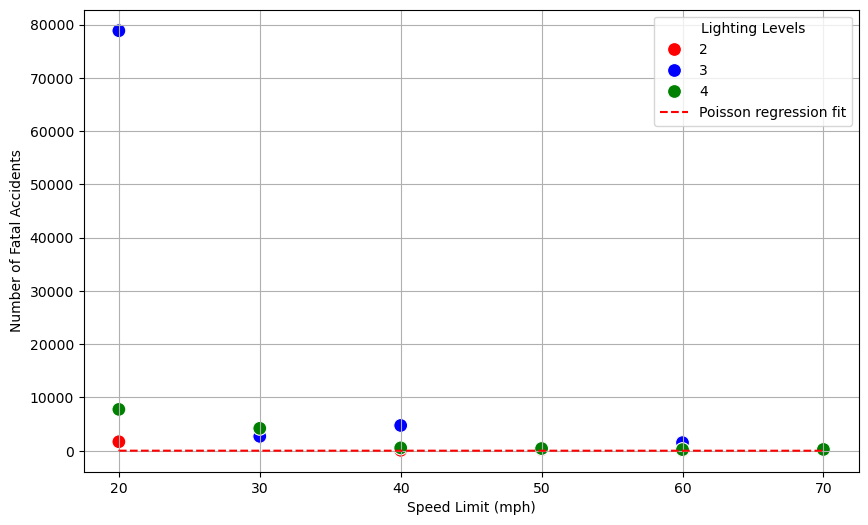

                          Poisson Regression Results                          
Dep. Variable:              accidents   No. Observations:                   18
Model:                        Poisson   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.6102
Time:                        14:34:53   Log-Likelihood:                -73270.
converged:                       True   LL-Null:                   -1.8797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.6971      0.016    776.138      0.000      12.665      12.729
speed_limit    -0.1432      0.000   -297.745      0.000      -0.144      -0.142
lighting        0.1221      0.004     32.430    

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Poisson

# Create the extended dataset with lighting levels
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create scatter plot for accidents vs. speed limit with lighting levels as color (red, blue, green)
sns.scatterplot(x='speed_limit', y='accidents', hue='lighting', palette={2: 'red', 3: 'blue', 4: 'green'}, data=df, s=100, marker='o')

# Fit Poisson regression model with both speed limit and lighting as predictors
model = Poisson.from_formula('accidents ~ speed_limit + lighting', data=df).fit()

# Get the predicted values from the model
df['predicted'] = model.fittedvalues

# Plot the predicted values as a line
plt.plot(df['speed_limit'], df['predicted'], color='r', linestyle='--', label='Poisson regression fit')

# Adding labels and title
plt.title("")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Fatal Accidents")
plt.legend(title="Lighting Levels")

# Display the plot
plt.grid(True)
plt.show()

# Display model summary
print(model.summary())


In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Your data (from the previous Poisson regression example)
data = {
    'speed_limit': [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60, 70, 70, 70],
    'lighting': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
    'accidents': [1689, 78846, 7763, 2620, 2703, 4207, 84, 4745, 538, 196, 463, 412, 44, 1520, 215, 91, 215, 245]
}

# Create DataFrame
df = pd.DataFrame(data)

# Fit Poisson regression model with both speed limit and lighting as predictors
model = sm.GLM(df['accidents'], sm.add_constant(df[['speed_limit', 'lighting']]), family=sm.families.Poisson()).fit()

# Get predicted values
df['predicted'] = model.fittedvalues

# Calculate SSE (Sum of Squared Errors)
SSE = np.sum((df['accidents'] - df['predicted'])**2)

# Calculate SST (Total Sum of Squares)
SST = np.sum((df['accidents'] - df['accidents'].mean())**2)

# Calculate SSR (Sum of Squares for Regression)
SSR = SST - SSE

# Calculate R-squared
R_squared = 1 - (SSE / SST)

# Calculate Standard Error (SE)
n = len(df)  # Number of observations
p = len(model.params)  # Number of parameters (including the intercept)
SE = np.sqrt(SSE / (n - p))

# Print the results
print(f"SSE (Sum of Squared Errors): {SSE}")
print(f"SST (Total Sum of Squares): {SST}")
print(f"SSR (Sum of Squares for Regression): {SSR}")
print(f"R-squared: {R_squared}")
print(f"Standard Error (SE): {SE}")


SSE (Sum of Squared Errors): 3747831842.220505
SST (Total Sum of Squares): 5706123698.0
SSR (Sum of Squares for Regression): 1958291855.7794948
R-squared: 0.3431912729942881
Standard Error (SE): 15806.816762018647


/var/folders/nn/px2pg7mx2dgdb26l6yfz_xr80000gn/T/ipykernel_5014/422123636.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='Blues')


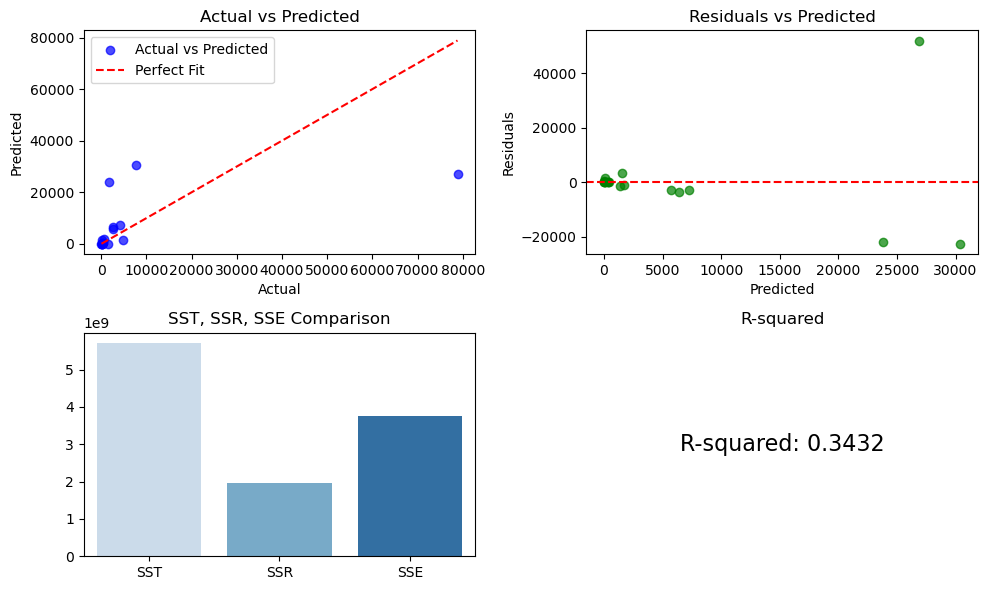

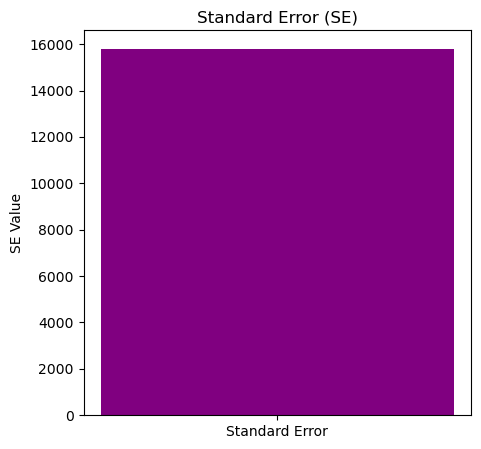

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your data and model results
actual = df['accidents']
predicted = df['predicted']
residuals = actual - predicted

# SSE, SST, SSR, R-squared, SE calculations
SSE = np.sum(residuals**2)
SST = np.sum((actual - actual.mean())**2)
SSR = SST - SSE
R_squared = 1 - (SSE / SST)
SE = np.sqrt(SSE / (len(df) - len(model.params)))

# 1. Plot of Actual vs. Predicted values and Residuals
plt.figure(figsize=(10, 6))

# Plot Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(actual, predicted, color='blue', label='Actual vs Predicted', alpha=0.7)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Plot Residuals
plt.subplot(2, 2, 2)
plt.scatter(predicted, residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# 2. Bar plot for SST, SSR, SSE
plt.subplot(2, 2, 3)
categories = ['SST', 'SSR', 'SSE']
values = [SST, SSR, SSE]
sns.barplot(x=categories, y=values, palette='Blues')
plt.title('SST, SSR, SSE Comparison')

# 3. R-squared Value
plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, f'R-squared: {R_squared:.4f}', fontsize=16, ha='center', va='center')
plt.axis('off')
plt.title('R-squared')

# Show all plots
plt.tight_layout()
plt.show()

# 4. Standard Error plot
plt.figure(figsize=(5, 5))
plt.bar(['Standard Error'], [SE], color='purple')
plt.title('Standard Error (SE)')
plt.ylabel('SE Value')
plt.show()
